## softmax回归
1. 从torchvision取fashion_mnist数据集
2. 定义softmax模型
3. 定义损失函数 => 交叉熵
4. 定义优化函数
5. 进行训练
6. 输出训练效果

In [53]:
import torch
import torchvision
import matplotlib.pyplot as plt

### 读取数据

In [54]:
def get_data(batch_size, train=True):
    dataset = torchvision.datasets.FashionMNIST('../data',
                                                train=train, download=True,
                                                transform=torchvision.transforms.ToTensor())
    dataloader = torch.utils.data.DataLoader(dataset, batch_size, num_workers=4)
    for data, label in iter(dataloader):
        yield data, label

def get_label_title(labels):
    label_title = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return [label_title[i] for i in labels]
def show_imgs(row, cols, imgs, titles):
    fig, axes = plt.subplots(row, cols, figsize=(9,2))
    axes = axes.flatten()
    for (ax, img, title) in zip(axes, imgs, titles):
        ax.set_title(title)
        ax.imshow(img.reshape(28, 28))

torch.Size([28, 28]) tensor([9, 0, 0, 3])


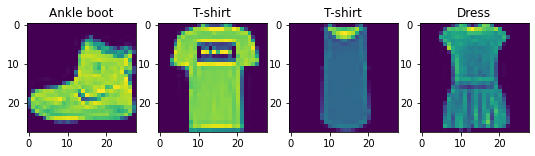

In [55]:
data_iter = get_data(4, train=True)
data, labels = next(data_iter)
print(data[0][0].shape, labels)
show_imgs(1, 4, data, get_label_title(labels))

### 定义softmax

In [56]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(1, keepdims=True)

### 定义模型

In [57]:
def net(x, w, b):
    return softmax(torch.matmul(x.reshape(-1, 784), w) + b)

### 定义损失函数

In [58]:
def loss(y, y_hat):
    return -torch.log(y_hat[range(len(y)), y])

### 定义优化函数

In [79]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [80]:
class Accumulator:
    def __init__(self, data_length):
        self.data = [0.0] * data_length
        
    def add(self, *args):
        self.data = [a + b for (a, b) in zip(self.data, args)]
    
    def clear(self):
        self.data = [0.0] * data_length
    
    def __getitem__(self, idx):
        return self.data[idx]

### 进行训练

In [93]:
def accuracy(y, y_hat):
    return float((y_hat.argmax(axis=1).type(y.dtype) == y).type(y.dtype).sum())
    
def train(batch_size, lr, w, b):
    accu = Accumulator(2)
    for x, y in get_data(batch_size, train=True):
        y_hat = net(x, w, b)
        l = loss(y, y_hat)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
        accu.add(accuracy(y, y_hat), y.numel())
    print('train set:', accu[0], accu[1], accu[0] / accu[1])
    return w, b

### 准确性验证

In [98]:
def show_accuracy():
    batch_size = 256
    lr = 0.1
    epochs = 10
    w = torch.normal(0, 1, size=(784, 10), requires_grad=True)
    b = torch.zeros(size=(1, 10), requires_grad=True)
    for epoch in range(epochs):
        accu = Accumulator(2)
        print('epoch:', epoch)
        w, b = train(batch_size, lr, w, b)
        for x, y in get_data(batch_size, train=False):
            accu.add(accuracy(y, net(x, w, b)), y.numel())
        print('test set:', accu[0], accu[1], accu[0] / accu[1])
show_accuracy()

epoch: 0
train set: 28814.0 60000.0 0.48023333333333335
test set: 5952.0 10000.0 0.5952
epoch: 1
train set: 37887.0 60000.0 0.63145
test set: 6526.0 10000.0 0.6526
epoch: 2
train set: 40608.0 60000.0 0.6768
test set: 6842.0 10000.0 0.6842
epoch: 3
train set: 42156.0 60000.0 0.7026
test set: 7038.0 10000.0 0.7038
epoch: 4
train set: 43199.0 60000.0 0.7199833333333333
test set: 7171.0 10000.0 0.7171
epoch: 5
train set: 43964.0 60000.0 0.7327333333333333
test set: 7278.0 10000.0 0.7278
epoch: 6
train set: 44547.0 60000.0 0.74245
test set: 7360.0 10000.0 0.736
epoch: 7
train set: 45064.0 60000.0 0.7510666666666667
test set: 7417.0 10000.0 0.7417
epoch: 8
train set: 45450.0 60000.0 0.7575
test set: 7470.0 10000.0 0.747
epoch: 9
train set: 45788.0 60000.0 0.7631333333333333
test set: 7528.0 10000.0 0.7528
